In [133]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import datetime
import numpy as np
import difflib

%matplotlib inline

In [134]:
AQIdata = pd.read_csv("AQIdata_uncleaned.csv")
industryPercentage = pd.read_csv("AirQuality-0/assets/data/industryPercentage.tsv", delimiter='\t')
countries = gpd.read_file("AirQuality-0/assets/data/countries.geo.json")

In [135]:
AQIdata.dropna(subset=['station_lat','station_lng'], inplace=True)

In [136]:
AQIdataSubset = AQIdata[AQIdata.time.apply(pd.to_datetime) > (AQIdata.time.apply(pd.to_datetime).max() - datetime.timedelta(hours=24))]
AQIdataSubset.reset_index(drop=True,inplace=True)
AQIdataSubset

,id,status,station,station_lat,station_lng,time,aqi,pm10,pm25,no2,o3,so2,co
0,0.0,ok,"Barrie, Ontario, Canada",44.382361,-79.702306,2019-05-17 13:00:00,19,NaN,17.0,2.3,19.2,NaN,NaN
1,1.0,ok,"Belleville, Ontario, Canada",44.150528,-77.395500,2019-05-17 13:00:00,30,NaN,30.0,1.7,28.9,NaN,NaN
2,2.0,ok,"Brampton, Ontario, Canada",43.698750,-79.780917,2019-05-17 13:00:00,31,NaN,13.0,1.8,31.2,0.3,1.9
3,3.0,ok,"Brantford, Ontario, Canada",43.138611,-80.292639,2019-05-17 13:00:00,38,NaN,38.0,2.5,31.2,8.2,1.6
4,4.0,ok,"Burlington, Ontario, Canada",43.315111,-79.802639,2019-05-17 13:00:00,30,NaN,30.0,5.5,28.9,0.6,1.6
5,5.0,ok,"Chatham, Ontario, Canada",42.403694,-82.208306,2019-05-17 13:00:00,26,NaN,17.0,1.3,26.4,NaN,NaN
6,6.0,ok,"Cornwall, Ontario, Canada",45.017972,-74.735222,2019-05-17 13:00:00,29,NaN,25.0,1.4,28.9,NaN,NaN
7,7.0,ok,"Dorset, Ontario, Canada",45.224278,-78.932944,2019-05-17 13:00:00,24,NaN,13.0,NaN,24.1,NaN,NaN
8,8.0,ok,"Grand Bend, Ontario, Canada",43.333083,-81.742889,2019-05-17 14:00:00,27,NaN,5.0,0.9,27.2,NaN,NaN
9,9.0,ok,"Guelph, Ontario, Canada",43.551611,-80.264167,2019-05-17 14:00:00,26,NaN,21.0,1.6,26.4,NaN,NaN


In [137]:
AQIdataSubset.id = AQIdataSubset.id.astype(int)

/Applications/anaconda/envs/autotrip/lib/python3.6/site-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [138]:
pd.DataFrame(AQIdataSubset.id).to_csv("stationIDs.csv", index=False)

In [139]:
point_list = []
for row in AQIdataSubset.iterrows():
    point_list.append(
        Point(row[1]['station_lng'],row[1]['station_lat'])
    )
AQIdataSubset['geometry'] = point_list

/Applications/anaconda/envs/autotrip/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [140]:
AQIdataShp = gpd.GeoDataFrame(AQIdataSubset)

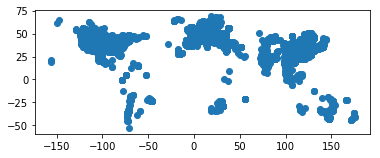

In [141]:
AQIdataShp.plot()

In [38]:
# AQIdataShp.to_file("aqi_shape.geojson", driver="GeoJSON")

## merge to countries for subset

In [142]:
merged_aqCountries = gpd.sjoin(AQIdataShp, countries)

/Applications/anaconda/envs/autotrip/lib/python3.6/site-packages/geopandas/tools/sjoin.py:56: UserWarning: CRS of frames being joined does not match!(None != {'init': 'epsg:4326'})
  '(%s != %s)' % (left_df.crs, right_df.crs))


In [143]:
unique_countries_ind = set(industryPercentage.Country.unique())
unique_merged_aqCountries = set(merged_aqCountries.name.unique())

ind_diff = unique_countries_ind.difference(unique_merged_aqCountries) 
aq_diff = unique_merged_aqCountries.difference(unique_countries_ind)

In [144]:
to_change = {}
for airpoldiff in ind_diff:
    for cndiff in aq_diff:
        try:
            the_ratio = difflib.SequenceMatcher(None, cndiff, airpoldiff).ratio()
            if the_ratio > 0.7:
                print("'%s' should be changed to '%s'. Similarity score = %s" % (airpoldiff, cndiff, round(the_ratio, 3)))
                to_change["{}".format(cndiff)] = airpoldiff
        except:
            pass

' Taiwan ' should be changed to 'Taiwan'. Similarity score = 0.857
' Indonesia ' should be changed to 'Indonesia'. Similarity score = 0.9
' New Caledonia ' should be changed to 'New Caledonia'. Similarity score = 0.929
' Ireland ' should be changed to 'Ireland'. Similarity score = 0.875
' Ireland ' should be changed to 'Iceland'. Similarity score = 0.75
' Laos ' should be changed to 'Laos'. Similarity score = 0.8
' Croatia ' should be changed to 'Croatia'. Similarity score = 0.875
' Kyrgyzstan ' should be changed to 'Kyrgyzstan'. Similarity score = 0.909
' United Kingdom ' should be changed to 'United Kingdom'. Similarity score = 0.933
' Turkey ' should be changed to 'Turkey'. Similarity score = 0.857
' Malta ' should be changed to 'Malta'. Similarity score = 0.833
' El Salvador ' should be changed to 'El Salvador'. Similarity score = 0.917
' Australia ' should be changed to 'Austria'. Similarity score = 0.778
' Australia ' should be changed to 'Australia'. Similarity score = 0.9
' Kos

In [146]:
## user prompt to change
for chng in to_change.items():
    change = input("Do you want to change %s to %s" % (chng[1], chng[0]))
    if change.lower() == "y":
        industryPercentage.replace(chng[1], chng[0], inplace=True)
        print("ITEM CHANGED")
    else:
        print("item not changed")

## DO NOT CHANGE FALKLAND ISLANDS

Do you want to change  Taiwan  to Taiwany
ITEM CHANGED
Do you want to change  Indonesia  to Indonesiay
ITEM CHANGED
Do you want to change  New Caledonia  to New Caledoniay
ITEM CHANGED
Do you want to change  Iceland  to Irelandn
item not changed
Do you want to change  Iceland  to Icelandy
ITEM CHANGED
Do you want to change  Laos  to Laosy
ITEM CHANGED
Do you want to change  Croatia  to Croatiay
ITEM CHANGED
Do you want to change  Kyrgyzstan  to Kyrgyzstany
ITEM CHANGED
Do you want to change  United Kingdom  to United Kingdomy
ITEM CHANGED
Do you want to change  Turkey  to Turkeyy
ITEM CHANGED
Do you want to change  Malta  to Maltay
ITEM CHANGED
Do you want to change  El Salvador  to El Salvadory
ITEM CHANGED
Do you want to change  Austria  to Austriay
ITEM CHANGED
Do you want to change  Austria  to Australian
item not changed
Do you want to change  Kosovo  to Kosovoy
ITEM CHANGED
Do you want to change  Mexico  to Mexicoy
ITEM CHANGED
Do you want to change  Denmark  to Denmarky
ITEM CHA

In [147]:
unique_countries_ind_new = set(industryPercentage.Country.unique())
unique_merged_aqCountries = set(merged_aqCountries.name.unique())
aq_diff_new = unique_merged_aqCountries.difference(unique_countries_ind_new)
ind_diff = unique_countries_ind_new.difference(unique_merged_aqCountries) 

In [148]:
aq_diff_new

{'Australia',
 'French Guiana',
 'Ireland',
 'Myanmar',
 'North Korea',
 'Republic of Serbia',
 'South Korea',
 'West Bank'}

In [149]:
## quantiles
q33 = industryPercentage["Industry"].quantile([.33]).values[0]
q66 = industryPercentage["Industry"].quantile([.66]).values[0]
print(q33, q66)
industryPercentage['q_vals'] = industryPercentage.Industry.apply(lambda ind: 1 if ind < q33 else 2 if ind > q33 and ind < q66 else 3)
industryPercentage["q_vals"].value_counts()

21.372 29.944000000000006


3    76
2    73
1    73
Name: q_vals, dtype: int64

In [150]:
merged_aqCountries = merged_aqCountries.merge(industryPercentage, left_on="name", right_on="Country")

In [151]:
merged_aqCountries

,id_left,status,station,station_lat,station_lng,time,aqi,pm10,pm25,no2,...,co,geometry,index_right,id_right,name,Country,Agriculture,Industry,Services,q_vals
0,0,ok,"Barrie, Ontario, Canada",44.382361,-79.702306,2019-05-17 13:00:00,19,NaN,17.0,2.3,...,NaN,POINT (-79.70230600000001 44.382361),28,CAN,Canada,Canada,1.9,27.1,71.0,2
1,1,ok,"Belleville, Ontario, Canada",44.150528,-77.395500,2019-05-17 13:00:00,30,NaN,30.0,1.7,...,NaN,POINT (-77.3955 44.150528),28,CAN,Canada,Canada,1.9,27.1,71.0,2
2,2,ok,"Brampton, Ontario, Canada",43.698750,-79.780917,2019-05-17 13:00:00,31,NaN,13.0,1.8,...,1.9,POINT (-79.780917 43.69875),28,CAN,Canada,Canada,1.9,27.1,71.0,2
3,3,ok,"Brantford, Ontario, Canada",43.138611,-80.292639,2019-05-17 13:00:00,38,NaN,38.0,2.5,...,1.6,POINT (-80.29263900000001 43.138611),28,CAN,Canada,Canada,1.9,27.1,71.0,2
4,4,ok,"Burlington, Ontario, Canada",43.315111,-79.802639,2019-05-17 13:00:00,30,NaN,30.0,5.5,...,1.6,POINT (-79.802639 43.315111),28,CAN,Canada,Canada,1.9,27.1,71.0,2
5,5,ok,"Chatham, Ontario, Canada",42.403694,-82.208306,2019-05-17 13:00:00,26,NaN,17.0,1.3,...,NaN,POINT (-82.20830600000001 42.403694),28,CAN,Canada,Canada,1.9,27.1,71.0,2
6,6,ok,"Cornwall, Ontario, Canada",45.017972,-74.735222,2019-05-17 13:00:00,29,NaN,25.0,1.4,...,NaN,POINT (-74.73522199999999 45.017972),28,CAN,Canada,Canada,1.9,27.1,71.0,2
7,7,ok,"Dorset, Ontario, Canada",45.224278,-78.932944,2019-05-17 13:00:00,24,NaN,13.0,NaN,...,NaN,POINT (-78.93294399999999 45.22427800000001),28,CAN,Canada,Canada,1.9,27.1,71.0,2
8,8,ok,"Grand Bend, Ontario, Canada",43.333083,-81.742889,2019-05-17 14:00:00,27,NaN,5.0,0.9,...,NaN,POINT (-81.74288900000001 43.333083),28,CAN,Canada,Canada,1.9,27.1,71.0,2
9,9,ok,"Guelph, Ontario, Canada",43.551611,-80.264167,2019-05-17 14:00:00,26,NaN,21.0,1.6,...,NaN,POINT (-80.264167 43.551611),28,CAN,Canada,Canada,1.9,27.1,71.0,2


In [152]:
merged_aqCountries.drop(['id_left','status','index_right','name'],axis=1, inplace=True)

In [154]:
# merged_aqCountries.to_file("aqi_shape_q.geojson", driver="GeoJSON")